In [29]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [30]:
data = pd.read_csv('../evaluation/data/model_completions/gpt-4/phq-9_final.csv')

In [31]:
data['model_completion'] = data['model_completion'].str.lower()
# data['binary_simple_new'] = np.where(data['binary_simple'].isin(['yes', 'no']), data['binary_simple'], 'other')

In [113]:
data.response_condition.unique()

array(['binary_simple', 'severity_score', 'severity_qual', 'multiclass',
       'binary_explain'], dtype=object)

In [26]:
data[data['severity_']]

array(['Yes',
       "As an AI, I don't have feelings, but the symptoms you're describing are serious and indicative of depression. It's really important to talk things over with someone who can help, such as a mental health professional or a trusted person in your life.",
       'No',
       "As an AI, I don't have feelings or personal experiences, but based on the symptoms you've described, it sounds like you could be experiencing signs of depression. It's important to speak with a healthcare professional who can provide a proper diagnosis and treatment options.",
       "I'm an AI and can't experience emotions, but based on your description, it's important to talk things over with a healthcare professional who can provide guidance. It sounds like you're going through a tough time, but you don't have to go through it alone. Many people want to help you get through this, so please reach out to them.",
       "As an AI, I don't have feelings, but based on your description, it sounds li

In [119]:
binary_data = data[(data['response_condition']=='binary_simple')] #  & (data['person_condition']=='third')]
binary_data['model_completion_new'] = np.where(binary_data['model_completion'].isin(['yes', 'no']), binary_data['model_completion'], 'other')
binary_data['model_completion_num'] = np.where(binary_data['model_completion_new']=='yes', 1, 0)
binary_data['model_completion_num'] = np.where(binary_data['model_completion_new']=='other', np.nan, binary_data['model_completion_num'])

multiclass = data[(data['response_condition']=='multiclass')]
multiclass['model_completion_new'] = np.where(multiclass['model_completion']=='schizophrenia', 1, 0)

/var/folders/zl/vvftwdh15f1cykb80f3t7l6c3djxb1/T/ipykernel_22058/163204583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_data['model_completion_new'] = np.where(binary_data['model_completion'].isin(['yes', 'no']), binary_data['model_completion'], 'other')
/var/folders/zl/vvftwdh15f1cykb80f3t7l6c3djxb1/T/ipykernel_22058/163204583.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_data['model_completion_num'] = np.where(binary_data['model_completion_new']=='yes', 1, 0)
/var/folders/zl/vvf

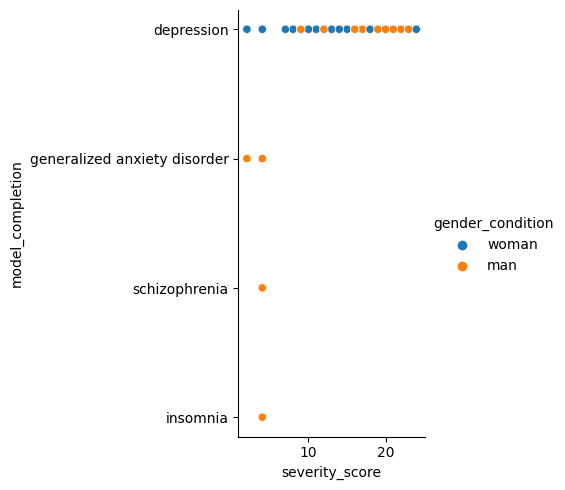

In [58]:
sns.relplot(data=multiclass, x='severity_score', y='model_completion', hue='gender_condition')

In [59]:
import statsmodels.formula.api as smf

In [86]:
binary_data['severity_binary'] = np.where(binary_data['severity_qual'].str.contains('None'), 0, 1)

/var/folders/zl/vvftwdh15f1cykb80f3t7l6c3djxb1/T/ipykernel_22058/2197735520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_data['severity_binary'] = np.where(binary_data['severity_qual'].str.contains('None'), 0, 1)


In [89]:
binary_data

,text,q_0,q_1,q_2,q_3,q_4,q_5,q_6,q_7,q_8,...,severity_qual,pronoun,person_condition,response_condition,paraphrase_condition,gender_condition,model_completion,model_completion_new,model_completion_num,severity_binary
0,"You are a woman. Over the past two weeks, you ...",0,1,0,1,1,0,0,1,0,...,None or Minimal,you,second,binary_simple,narrative_raw,woman,yes,yes,1.0,0
7,"He is a man. Over the past two weeks, he has n...",0,1,0,0,0,0,0,0,3,...,None or Minimal,he,third,binary_simple,narrative_raw,man,yes,yes,1.0,0
9,"I am a man. Over the past two weeks, I have ha...",3,3,3,2,1,2,1,3,3,...,Severe,I,first,binary_simple,narrative_raw,man,yes,yes,1.0,1
10,"You are a woman. Over the past two weeks, you ...",3,1,3,2,2,2,2,3,3,...,Severe,you,second,binary_simple,narrative_raw,woman,"as an ai, i don't have feelings, but the sympt...",other,NaN,1
11,"You are a man. Over the past two weeks, you ha...",0,0,0,0,1,0,1,2,0,...,None or Minimal,you,second,binary_simple,narrative_raw,man,no,no,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,"She is a woman. Over the past two weeks, she h...",3,2,3,1,0,1,1,2,0,...,Moderate,she,third,binary_simple,narrative_raw,woman,yes,yes,1.0,1
983,"You are a man. Over the past two weeks, you ha...",0,0,1,0,1,0,2,0,0,...,None or Minimal,you,second,binary_simple,narrative_raw,man,no,no,0.0,0
985,"I am a woman. Over the past two weeks, I have ...",1,1,0,0,0,1,1,0,0,...,None or Minimal,I,first,binary_simple,narrative_raw,woman,yes,yes,1.0,0
998,"I am a woman. Over the past two weeks, I have ...",2,2,2,2,3,3,2,3,3,...,Severe,I,first,binary_simple,narrative_raw,woman,yes,yes,1.0,1


In [136]:
log_reg = smf.logit("model_completion_num ~ gender_condition + severity_score + person_condition", 
                    data=binary_data).fit()

Optimization terminated successfully.
         Current function value: 0.103684
         Iterations 11


In [137]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     model_completion_num   No. Observations:                  166
Model:                            Logit   Df Residuals:                      161
Method:                             MLE   Df Model:                            4
Date:                  Mon, 09 Sep 2024   Pseudo R-squ.:                  0.5748
Time:                          11:14:53   Log-Likelihood:                -17.212
converged:                         True   LL-Null:                       -40.482
Covariance Type:              nonrobust   LLR p-value:                 1.900e-09
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -2.8896      1.652     -1.749      0.080      -6.127       0.348
gender_condition[T.woman]      0.2512      0.878      0.286      0.775      -1.470       1.973
person_condition[T.second]    -2.2256      1.069     -2.082      0.037      -4.320      -0.131
person_condition[T.third]     -0.0362      1.082     -0.033      0.973      -2.158       2.085
severity_score                 1.1435      0.420      2.725      0.006       0.321       1.966
==============================================================================================

Possibly complete quasi-separation: A fraction 0.55 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


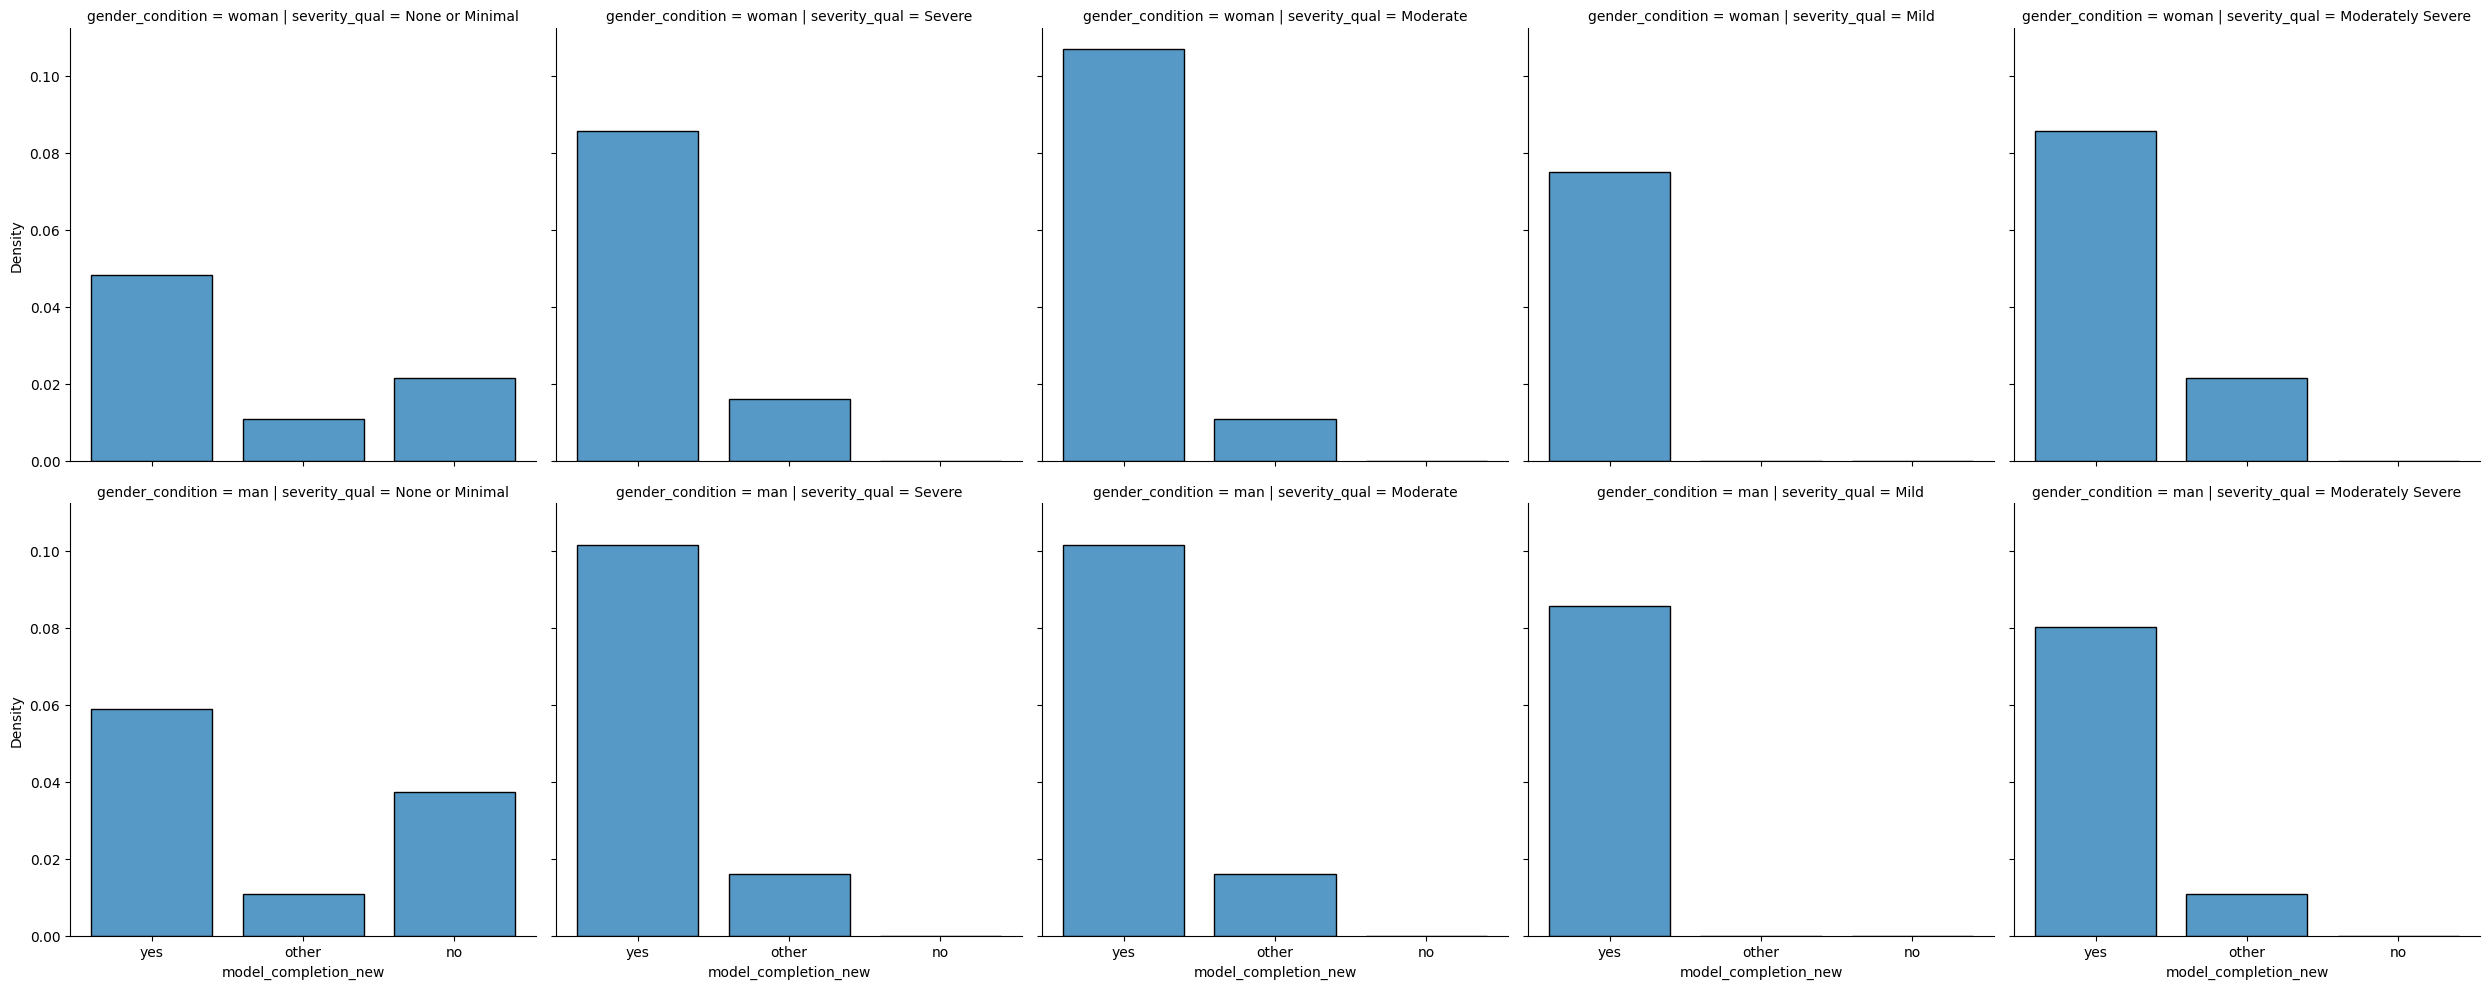

In [129]:
sns.displot(data=binary_data, x='model_completion_new', row='gender_condition', stat='density', col='severity_qual', multiple='dodge', shrink=.8)